<a href="https://colab.research.google.com/github/aibak365/Machine-learning/blob/main/Clothes_Detiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
train_data = datasets.FashionMNIST(
  root = "data",
  train= True,
  download= True,
  transform= ToTensor(),
  target_transform= None
)
test_data = datasets.FashionMNIST(
  root = "data",
  train= False,
  download= True,
  transform= ToTensor(),
  target_transform= None
)

In [ ]:
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

image shape: torch.Size([1, 28, 28])
AxesImage(size=(28, 28))


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

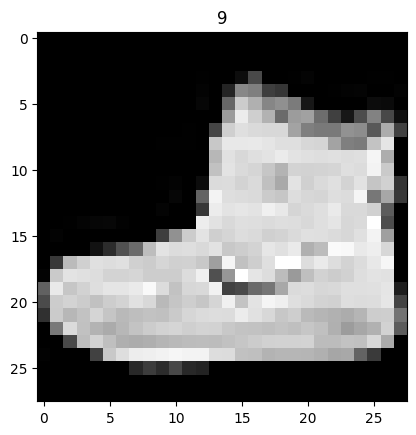

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.title(label)
print(plt.imshow(image.squeeze(),cmap="gray"))
image

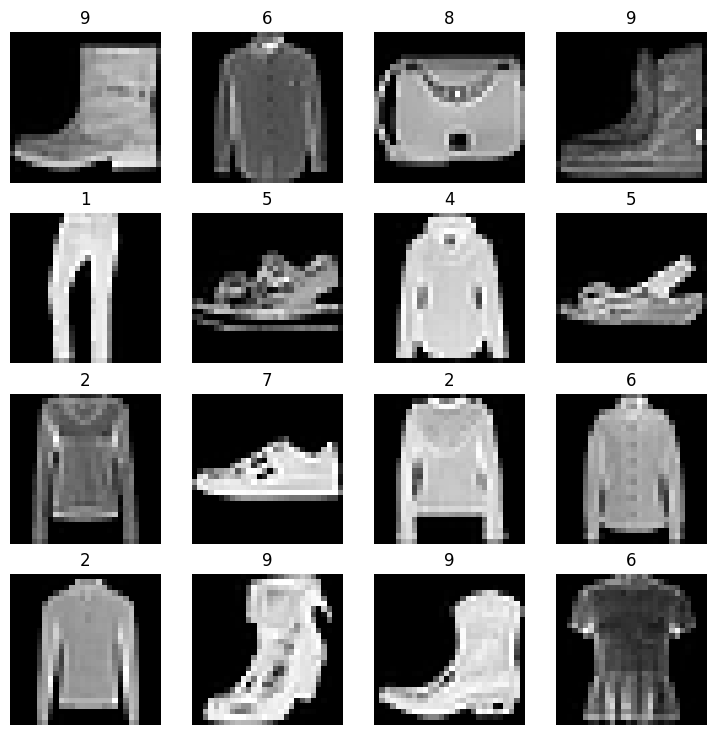

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  tandom_idx = torch.randint(0,len(train_data), size=[1]).item()
  img, label = train_data[tandom_idx]
  fig.add_subplot(rows, cols, i)
  plt.title(label)
  plt.imshow(img.squeeze(), cmap= "gray")
  plt.axis(False)


In [ ]:
from torch. utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset= train_data,batch_size= BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset= test_data,batch_size= BATCH_SIZE, shuffle=False)
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"length of {len(train_dataloader),len(test_dataloader)} ")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d979418c3a0>, <torch.utils.data.dataloader.DataLoader object at 0x7d979418c8b0>)
length of (1875, 313) 


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape

torch.Size([32, 1, 28, 28])

image size: torch.Size([1, 28, 28])
label 6, label size torch.Size([])


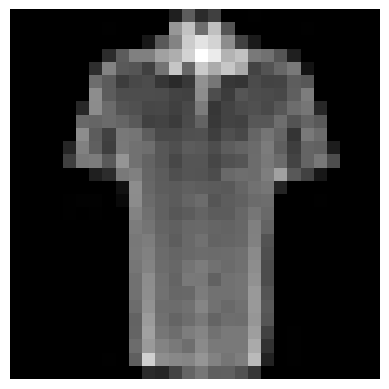

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.axis(False)
print(f"image size: {img.shape}")
print(f"label {label}, label size {label.shape}")

In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape,
                                               out_features=hidden_units),
                                     nn.Linear(in_features=hidden_units,
                                               out_features=output_shape)
                                     )
  def forward(self, x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape= 28*28,
    hidden_units= 10,
    output_shape= 10
).to("cpu")

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)


In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}......")
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch%400==0:
      print(f"looked at {batch*len(X)}/{len(train_dataloader.dataset)}")
  train_loss/=len(train_dataloader)
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred = model_0(X)
      test_loss+=loss_fn(test_pred,y)
      test_acc+= accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    test_loss/=len(test_data)
    test_acc/=len(test_dataloader)
  print(f"train loss: {train_loss} test loss {test_loss}, test acc {test_acc}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0......
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000
train loss: 0.9096065759658813 test loss 0.019688185304403305, test acc 78.63418530351437
Epoch: 1......
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000
train loss: 0.557327151298523 test loss 0.017029905691742897, test acc 81.13019169329074
Epoch: 2......
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000
train loss: 0.5026633739471436 test loss 0.016078032553195953, test acc 81.9988019169329
Epoch: 3......
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000
train loss: 0.4765265882015228 test loss 0.015475464053452015, test acc 82.78753993610223
Epoch: 4......
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000
train loss: 0.4602505564689636 test l

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc =0,0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc+= accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}
model_0_results = eval_model(model= model_0,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)
print(model_0_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.4836103618144989, 'model_acc': 83.06709265175719}


In [ ]:
device = "cuda" if torch.cuda.is_available else "cpu"

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape,
                                               out_features=hidden_units),
                                     nn.ReLU(),
                                     nn.Linear(in_features=hidden_units,
                                               out_features=output_shape),
                                     nn.ReLU()
                                     )
  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape= 28*28,
                              hidden_units=10,
                              output_shape=10)


In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU


        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


In [ ]:
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
model_1_results = eval_model(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
Train loss: 1.42962 | Train accuracy: 53.82%
Test loss: 1.12595 | Test accuracy: 61.12%

Epoch: 1
Train loss: 1.03311 | Train accuracy: 64.74%
Test loss: 0.99831 | Test accuracy: 64.83%

Epoch: 2
Train loss: 0.96039 | Train accuracy: 66.03%
Test loss: 0.96088 | Test accuracy: 65.46%

Epoch: 3
Train loss: 0.92943 | Train accuracy: 66.50%
Test loss: 0.94941 | Test accuracy: 65.63%

Epoch: 4
Train loss: 0.91063 | Train accuracy: 67.01%
Test loss: 0.93041 | Test accuracy: 65.77%



In [ ]:
class FashionModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

  def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionModelV2(input_shape=1,
    hidden_units=10,
    output_shape=10)
model_2


FashionModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
model_2 = FashionModelV2(input_shape=1, hidden_units=10,output_shape=10)

In [ ]:
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"image batch shape: {images.shape}")
print(f"Single image shape:{test_image.shape}")
print(f"test image: {test_image}")

image batch shape: torch.Size([32, 3, 64, 64])
Single image shape:torch.Size([3, 64, 64])
test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       padding=1,
                       stride=1)
conv_output = conv_layer(test_image.unsqueeze(0))

In [ ]:
from helper_functions import accuracy_fn
model_2 = FashionModelV2(input_shape=1,
    hidden_units=10,
    output_shape=10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59885 | Train accuracy: 78.53%
Test loss: 0.39840 | Test accuracy: 85.66%

Epoch: 1
---------
Train loss: 0.36717 | Train accuracy: 86.76%
Test loss: 0.35455 | Test accuracy: 87.13%

Epoch: 2
---------
Train loss: 0.33193 | Train accuracy: 88.09%
Test loss: 0.34353 | Test accuracy: 87.50%



In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionModelV2',
 'model_loss': 0.3435334861278534,
 'model_acc': 87.5}

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

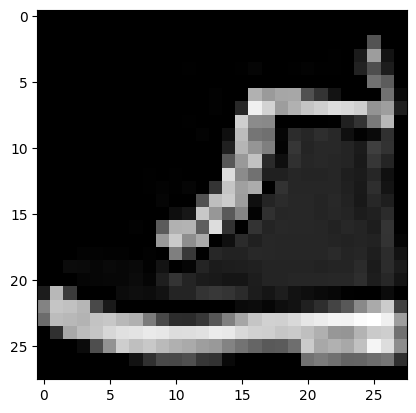

In [ ]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
  test_samples[0].shape
plt.imshow(test_samples[0].squeeze(),cmap="gray")

In [ ]:
pred_probs = make_predictions(model = model_2, data= test_samples)
pred_probs[:2]

tensor([[9.4606e-06, 2.5089e-07, 9.8853e-06, 3.0177e-06, 2.5472e-07, 7.9117e-03,
         7.2971e-06, 8.8239e-03, 5.4258e-04, 9.8269e-01],
        [1.4959e-05, 4.6986e-07, 6.6680e-06, 2.1127e-06, 9.7431e-06, 1.0382e-03,
         9.3904e-06, 9.9238e-01, 8.2909e-04, 5.7082e-03]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 4, 5, 4])

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

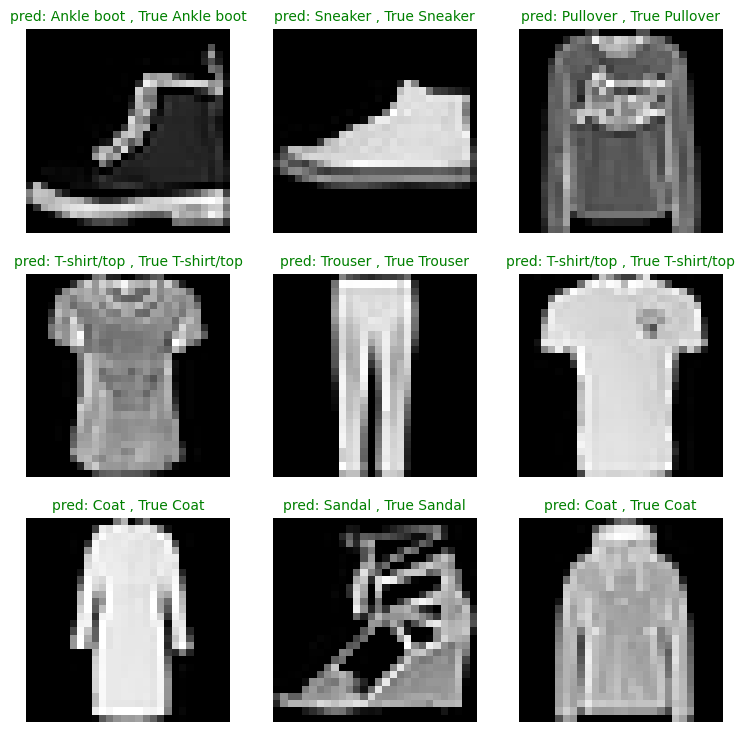

In [ ]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_test = f"pred: {pred_label} , True {truth_label}"
  if pred_label == truth_label:
    plt.title(title_test, fontsize=10, c="g")
  else:
    plt.title(title_test, fontsize=10, c="r")
  plt.axis(False)